# Setup

On the Wikipedia page for the Kernel Method, there is an example of two-class radial data that can't be linearly separated. We want to see how neural networks build a decision boundary for such data.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.graph_objects as go

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop, SGD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# setting constants
radius = 20
N = 200
threshold = 0.5

# used in plotting the NN decision boundary
colorscale = ['rgb(167,167,167)','rgb(68,68,68)']
grid_size = 100

In [68]:
def random_point(radius0, radius1, center_x = 0, center_y = 0):
    """ Returns a random point on the disc/annulus bounded by radii radius0 and radius1 """
    
    # random angle
    alpha = 2*np.pi*np.random.rand()
    
    # random radius
    r = radius1*np.sqrt(np.random.rand()) + radius0
    
    # calculating coordinates
    x = r*np.cos(alpha) + center_x
    y = r*np.sin(alpha) + center_y
   
    return x, y

def create_df(radius1: float, radius2: float, N = 200, label = 0):
    """ Return a pandas DataFrame consisting of 3 columns: 'x', 'y', and 'label' 
    
        The 'x' and 'y' columns are populated by random points from the random_point
        function.
    """
    
    df = pd.DataFrame(
        [random_point(radius1, radius2) for i in range(N)],
        columns = ['x', 'y']
    )
    
    df['label'] = label
    
    return df

def build_data(radius: float, N = 200) -> pd.DataFrame:
    """ Build a dataset of radial data with two class labels """
    
    # create df for class 0
    df1 = create_df(0, radius, N = N, label = 0)
    
    # create df for class 1
    df2 = create_df(radius, 3*radius, N = N, label = 1)
    
    return pd.concat([df1, df2])

def plot_data(df, colors = ['red', 'purple'], fig = None, ax = None, train = False):
    """ Create scatterplot of radial data from two classes """
    
    colors = colors
    
    # separate data by class label
    label0 = df[df['label'] == 0]
    label1 = df[df['label'] == 1]
    
    if not fig and not ax:
        fig, ax = plt.subplots(figsize = (10, 10))
       
    # add scatterplots to the figure
    for label, color in zip([label0, label1], colors):
        ax.scatter(label['x'], label['y'], color = color)
    
    if not train:
        plt.show()
    
    return None

def get_boundary(nn_model, grid_size = 100):
    """ Accepts a trained NN model and returns the model's decision boundary as z-values """
    
    grid_size = grid_size

    x_axis = np.linspace(data['x'].min(), data['x'].max(), grid_size)
    y_axis = np.linspace(data['y'].min(), data['y'].max(), grid_size)

    xx, yy = np.meshgrid(x_axis, y_axis)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(Z > threshold, 1, 0)

    # for plotting
    zz = Z.reshape(xx.shape)
    
    return x_axis, y_axis, zz

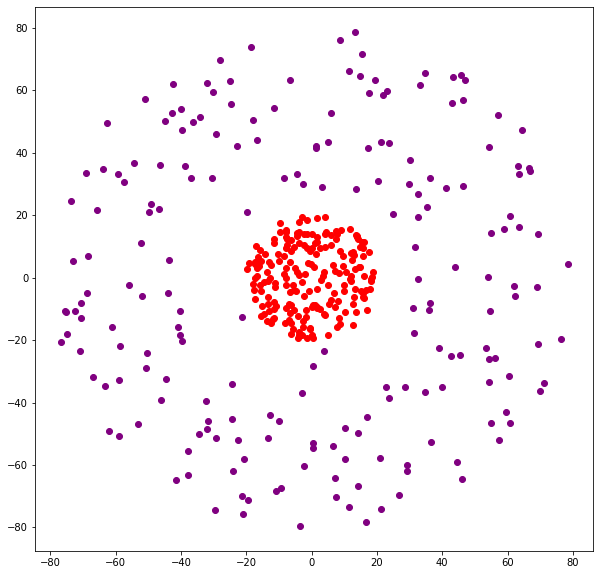

In [69]:
# set up the data and plot an example
data = build_data(radius, N = N)

plot_data(data)

# Create the neural network

In [29]:
# separate into training and testing sets
X = data[['x','y']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [30]:
# define the nn model
batch_size = 10

model = Sequential([
    Input(shape = (2,)),
    Dense(units = 128, activation = 'relu', use_bias = True),
    Dense(units = 1, activation = 'sigmoid')
])

print(model.summary())

# compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(learning_rate = 0.01), 
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# fit the model
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
28/28 [==============================] - 0s 387us/step - loss: 0.7022 - accuracy: 0.5258
Epoch 2/100
28/28 [==============================] - 0s 311us/step - loss: 0.6600 - accuracy: 0.5226
Epoch 3/100
28/28 [==============================] - 0s 302us/step - loss: 0.7623 - accuracy: 0.4716
Epoch 4/100
28/28 [==============================] - 0s 307us/step - loss: 0.4902 - accuracy: 0.6449
Epoch 5/100
28/28 [==============================] - 0s 313us/step - loss: 0.4909 - accuracy: 0.6706
Epoch 6/100
28/28 [==============================] - 0s 319us/step - loss: 0.4353 - accuracy: 0.7266
Epoch 7/100
28/28 [==============================] - 0s 304us/step - loss: 0.5423 - accuracy: 0.6363
Epoch 8/100
28/28 [==============================] - 0s 314us/step - loss: 0.4677 - accuracy: 0.7331
Epoch 9/100
28/28 [==============================] - 0s 310us/step - loss: 0.4199 - accuracy: 0.7798
Epoch 10/100
28/28 [==============================] - 0s 309us/step - loss: 0.4354 - accura

In [32]:
# predict class labels on the test set
trained_predictions = model.predict(X_test)

df_pred = X_test.copy()

df_pred['label'] = np.where(trained_predictions > threshold, 1, 0)

# put the training and testing data into dataframes - separated by class labels
df_train = pd.concat([X_train, y_train], axis = 1)

# Plot the decision boundary

I'll define a uniform mesh over the sample area and use the NN to predict the class labels. With these predictions, I'll plot the decision boundary as a filled contour plot.

In [33]:
x_axis, y_axis, boundary = get_boundary(model)

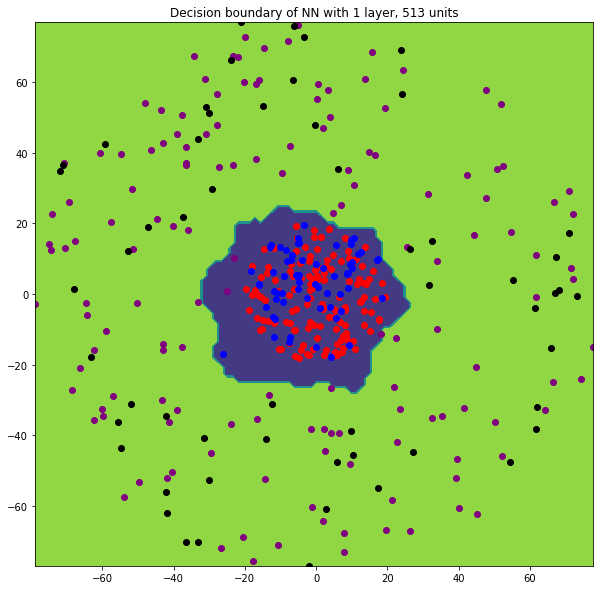

In [40]:
# this plots the NN decision boundary
fig1, ax1 = plt.subplots(figsize = (10, 10))

ax1.contourf(x_axis, y_axis, boundary, levels = 2)
ax1.set_title('Decision boundary of NN with 1 layer, {} units'.format(model.count_params()))

# fig1 = go.Figure(
#     go.Contour(
#         z = boundary,
#         x = x_axis,
#         y = y_axis,
#         colorscale = colorscale
#     )
# )

# fig1.update_layout(
#     title = 'Decision boundary of NN with 1 layer, {} units'.format(model.count_params())
# )

# plot the training and testing data
plot_data(df_train, fig = fig1, ax = ax1, train = True)
plot_data(df_pred, colors = ['Blue', 'Black'], fig = fig1, ax = ax1)

In [48]:
""" - precision is the proportion of correct predictions
    - recall is the proportion of relevant predictions returned 
    (in this case, every test input resulted in a prediction)
"""
print(classification_report(y_test, df_pred['label'], target_names = ['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99        64
     class 1       1.00      0.98      0.99        56

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



# Add one layer of depth to the NN

In [49]:
# define the nn model
batch_size = 10

model = Sequential([
    Input(shape = (2,)),
    Dense(units = 32, activation = 'relu', use_bias = True),
    Dense(units = 32, activation = 'relu', use_bias = True),
    Dense(units = 1, activation = 'sigmoid')
])

print(model.summary())

# compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(learning_rate = 0.01), 
              metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
# fit the model
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
28/28 [==============================] - 0s 401us/step - loss: 0.8212 - accuracy: 0.5331
Epoch 2/100
28/28 [==============================] - 0s 320us/step - loss: 0.5654 - accuracy: 0.5614
Epoch 3/100
28/28 [==============================] - 0s 313us/step - loss: 0.5394 - accuracy: 0.5687
Epoch 4/100
28/28 [==============================] - 0s 325us/step - loss: 0.4798 - accuracy: 0.6425
Epoch 5/100
28/28 [==============================] - 0s 325us/step - loss: 0.4530 - accuracy: 0.6614
Epoch 6/100
28/28 [==============================] - 0s 351us/step - loss: 0.4449 - accuracy: 0.6958
Epoch 7/100
28/28 [==============================] - 0s 317us/step - loss: 0.5439 - accuracy: 0.6355
Epoch 8/100
28/28 [==============================] - 0s 312us/step - loss: 0.4276 - accuracy: 0.7829
Epoch 9/100
28/28 [==============================] - 0s 301us/step - loss: 0.4112 - accuracy: 0.7717
Epoch 10/100
28/28 [==============================] - 0s 311us/step - loss: 0.3962 - accura

In [51]:
# predict class labels on the test set
trained_predictions = model.predict(X_test)

df_pred = X_test.copy()

df_pred['label'] = np.where(trained_predictions > threshold, 1, 0)

# put the training and testing data into dataframes - separated by class labels
df_train = pd.concat([X_train, y_train], axis = 1)

In [52]:
x_axis, y_axis, boundary = get_boundary(model)

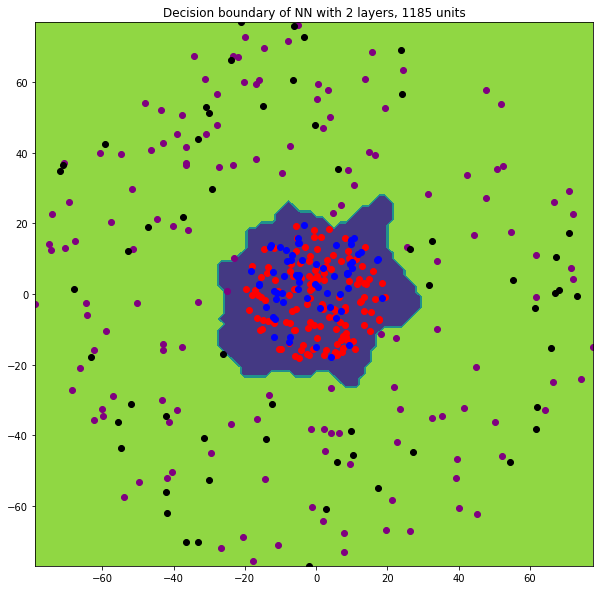

In [53]:
# this plots the NN decision boundary
fig1, ax1 = plt.subplots(figsize = (10, 10))

ax1.contourf(x_axis, y_axis, boundary, levels = 2)
ax1.set_title('Decision boundary of NN with 2 layers, {} units'.format(model.count_params()))

# plot the training and testing data
plot_data(df_train, fig = fig1, ax = ax1, train = True)
plot_data(df_pred, colors = ['Blue', 'Black'], fig = fig1, ax = ax1)

In [54]:
print(classification_report(y_test, df_pred['label'], target_names = ['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        64
     class 1       1.00      1.00      1.00        56

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Comparing to a kernel classifier

In [55]:
# map the data to a paraboloid in 3D
data['z'] = data['x']**2 + data['y']**2

In [56]:
# separate into training and testing sets
X = data[['x','y','z']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [57]:
number_of_classes = 1
number_of_features = 3 #X_train.shape[1]
logit = Sequential(
    Dense(number_of_classes, activation = 'sigmoid', input_dim = number_of_features)
)

logit.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [58]:
history_logit = logit.fit(
    X_train, y_train,
    batch_size = batch_size,
    epochs = 100,
    verbose = 1
)

Epoch 1/100
28/28 [==============================] - 0s 403us/step - loss: 16.3566 - accuracy: 0.5143
Epoch 2/100
28/28 [==============================] - 0s 291us/step - loss: 15.1181 - accuracy: 0.4865
Epoch 3/100
28/28 [==============================] - 0s 313us/step - loss: 13.8551 - accuracy: 0.4922
Epoch 4/100
28/28 [==============================] - 0s 294us/step - loss: 10.4185 - accuracy: 0.5230
Epoch 5/100
28/28 [==============================] - 0s 306us/step - loss: 6.8540 - accuracy: 0.5662
Epoch 6/100
28/28 [==============================] - 0s 304us/step - loss: 5.1763 - accuracy: 0.6299
Epoch 7/100
28/28 [==============================] - 0s 291us/step - loss: 3.8456 - accuracy: 0.6833
Epoch 8/100
28/28 [==============================] - 0s 296us/step - loss: 2.9961 - accuracy: 0.6961
Epoch 9/100
28/28 [==============================] - 0s 301us/step - loss: 3.5082 - accuracy: 0.6586
Epoch 10/100
28/28 [==============================] - 0s 300us/step - loss: 3.3359 - ac

## June 9 - Got it working

In [59]:
# get predictions
x_axis = np.linspace(data['x'].min(), data['x'].max(), grid_size)
y_axis = np.linspace(data['y'].min(), data['y'].max(), grid_size)

xx, yy = np.meshgrid(x_axis, y_axis)

zz = xx**2 + yy**2

Z = logit.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = np.where(Z > threshold, 1, 0)

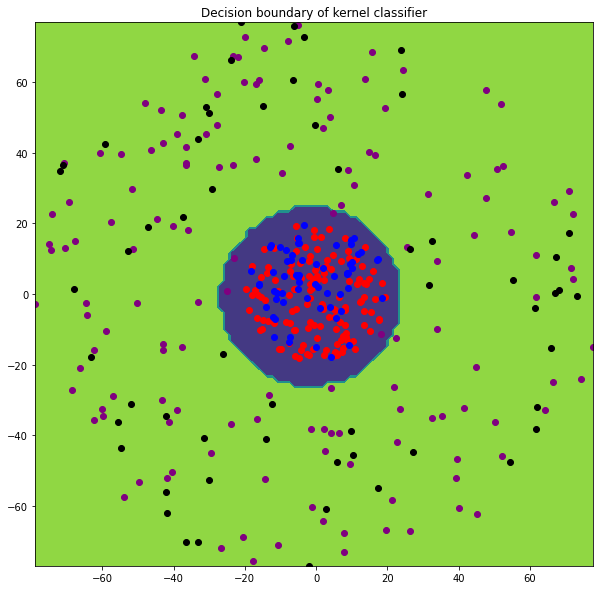

In [62]:
# this plots the kernel logistic regression decision boundary
fig1, ax1 = plt.subplots(figsize = (10, 10))

ax1.contourf(x_axis, y_axis, Z.reshape(xx.shape), levels = 2)
ax1.set_title('Decision boundary of kernel classifier')

# plot the training and testing data
plot_data(df_train, fig = fig1, ax = ax1, train = True)
plot_data(df_pred, colors = ['Blue', 'Black'], fig = fig1, ax = ax1)

# I need to get the classification report working for the kernel classifier